# Optimization Algorithms in Neural Networks

This section covers optimization algorithms used in updating the weights of a neural network.

## Overview of Optimization Algorithms

- Optimization is crucial in determining how a neural network learns.
- Different optimization algorithms are variations of the gradient descent base algorithm.
- Optimization involves minimizing the error function by adjusting the weights.



# Gradient Descent

- Often seen as the parent of all other optimization algorithms, gradient descent is a base algorithm that is implemented in the weight update process of a network.
- The aim is to achieve the minimum point on the error function. This involves changing the weights based on the derivative of the error with respect to the weight - a process known as backpropagation.
- The concept can be illustrated as a ball rolling downhill where you are calculating the slope and moving in the opposing direction to the slope.


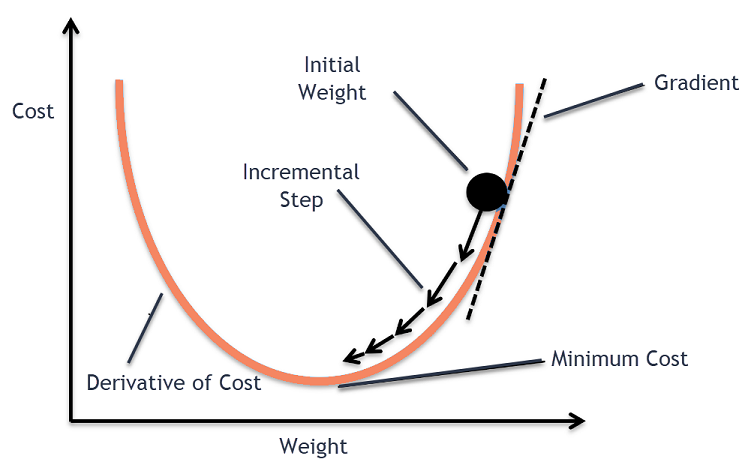

# Batch Gradient Descent

- Batch gradient descent involves taking all of your samples at once, feeding them through the network, calculating the error and then backpropagating this error to update the weights.
- Here one iteration equals one epoch. This is because all the samples in the dataset are passed through the neural network simultaneously.
- The weight update rule for batch gradient descent is `new weight = old weight - learning rate * derivative of the error with respect to the weights`.


$new\_weight = old\_weight - learning\_rate * derivative\_of\_the\_error\_with\_respect\_to\_weights$


# Stochastic Gradient Descent (SGD) Summary

## Description
Stochastic Gradient Descent (SGD) is an optimization method whereby weights are updated ***one*** sample at a time. This results in the number of iterations per epoch being equal to the number of samples in the dataset as each sample has to be run through to complete one epoch.

### Key Steps
1. Take a single sample from the dataset.
2. Calculate its loss.
3. Update the weights accordingly.
4. Repeat this process for all samples in the dataset.

### Weight Update Formula
The weight update rule is represented mathematically as follows:
- `New weight = Old weight - (Learning Rate * Derivative of the Error with respect to Weights)`
- The error is calculated only for one sample.

### Noise in SGD
Since SGD works on a single sample at a time, the resultant loss function graph can often be noisy due to the unique weights each sample may require. However, it gradually converges to the optimal solution.

### Performance
Despite the noise, research has shown that SGD, particularly with momentum, can sometimes outperform other optimization algorithms on specific tasks.

### SGD pyTorch
[SGD Details](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html)

#Mini-Batch SGD
- This is more realistic approach
- Here we combine best of both worlds
- We take mini batch of the total dataset and pass it to the network, calculate the error and run backpropagation to update the weights.

#Exponentially weighted average (!important)

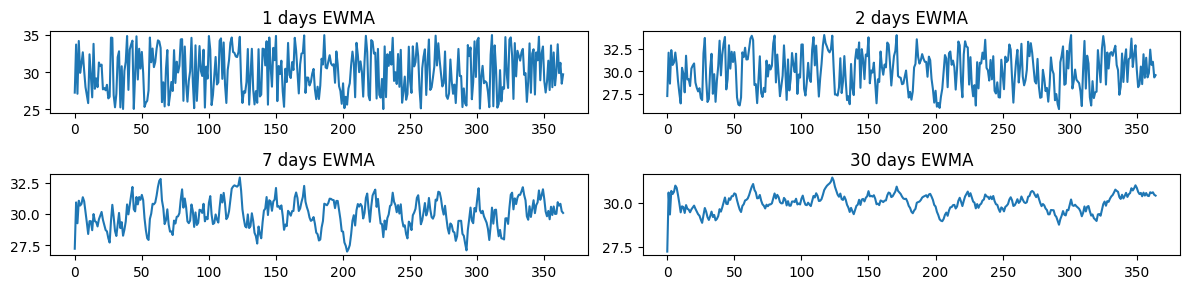

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Function to calculate exponentially weighted moving average
def calculate_ewma(data, span):
    return pd.Series(data).ewm(span=span).mean().to_numpy()

def plot_ewma(temperatures, avg_values, subplot_dims):
    assert len(avg_values) == subplot_dims[0]*subplot_dims[1], "Mismatch between subplot dimensions and number of graphs"

    # Create subplots
    fig, axs = plt.subplots(*subplot_dims, figsize=(12, 3))

    # Plot exponentially weighted moving averages in a loop
    for ax, avg_value in zip(axs.flatten(), avg_values):
        ewma = calculate_ewma(temperatures, avg_value)
        ax.plot(ewma)
        ax.set_title(f'{avg_value} days EWMA')

    # Display the plots
    plt.tight_layout()
    plt.show()

# Generate pseudo random temperatures
np.random.seed(5)
temperatures = np.random.uniform(25, 35, 365)

# Plot exponentially weighted moving averages
plot_ewma(temperatures, [1,2,7,30], subplot_dims=(2,2))


The Exponentially Weighted Average (EWA) formula is typically represented as:

Vₜ = β ⋅ Vₜ₋₁ + (1 - β) ⋅ θₜ

e.g. β  = 0.98

Where:
- Vₜ is the current exponentially weighted average.
- Vₜ₋₁ is the previous exponentially weighted average.
- θₜ is the current observation.
- β is the smoothing factor, typically between 0 and 1, which determines the weight given to the current observation relative to the previous average.


##EWA bias correction
- Notice how starting values are almost zero for 7 and 30 days?
- This is because we are giving higher weightage to older values than new values
- And there are no old values, hence zero, therefore we need to correct this formula for bias.

The Exponentially Weighted Average (EWA) formula with bias correction is typically represented as:

Vₜ = β ⋅ Vₜ₋₁ + (1 - β) ⋅ θₜ

Bias corrected formula:

V̂ₜ = Vₜ / (1 - βᵗ)

Where:
- Vₜ is the current exponentially weighted average.
- Vₜ₋₁ is the previous exponentially weighted average.
- θₜ is the current observation.
- β is the smoothing factor, typically between 0 and 1, which determines the weight given to the current observation relative to the previous average.
- t is the time step.
- V̂ₜ is the bias-corrected exponentially weighted average.


#Momentum and Gradient Decent

- EWA can be applied to any series, be it temperature of the day, height, weight and of course to the derivatives.
- Lets assume our cost function looks like this.

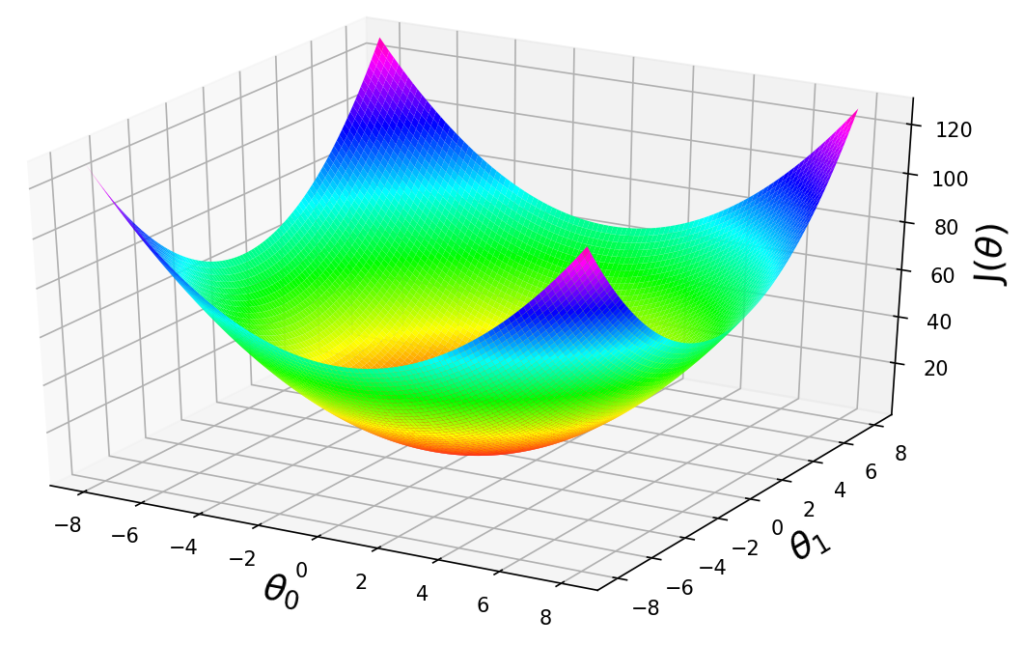

- Now Imagine if take each and every point on the graph and project it to the 2D plane.
- Lets move to my fav tool, mspaint

#All Optimizers

https://pytorch.org/docs/stable/optim.html

#Visualization
[Click here](https://www.ruder.io/optimizing-gradient-descent/)

In [ ]:
import torch

In [ ]:
x = torch.ones((2, 2), requires_grad=True)
x

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)

In [ ]:
y = x + 2
z = 2* y * y
out = z.mean()

In [ ]:
y, z, out

(tensor([[3., 3.],
         [3., 3.]], grad_fn=<AddBackward0>),
 tensor([[18., 18.],
         [18., 18.]], grad_fn=<MulBackward0>),
 tensor(18., grad_fn=<MeanBackward0>))

In [ ]:
print(x.grad)

None


In [ ]:
out.backward()
print(x.grad)

tensor([[3., 3.],
        [3., 3.]])


So, the concrete steps of differentiation of out with respect to x goes as follows:

Given y = x + 2 and z = 2*y*y, we want to find ∂out/∂x = ∂(z.mean())/∂x = ∂(1/4sum(2(x+2)^2))/∂x.

Chain rule gives us: ∂out/∂x = ∂out/∂z * ∂z/∂y * ∂y/∂x

From the calculation we will have:

∂out/∂z = 1/4, ∂z/∂y = 4y = 4(x+2), ∂y/∂x = 1

So, ∂out/∂x = 1/4 * 4 * (x + 2) = (x + 2)

That’s why when we print x.grad we will get a tensor of [[3., 3.], [3., 3.]], because every single element of x was 1 so 1 + 2 = 3!